In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to Load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

### City Data Import

In [3]:
# Read files to CSV
city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Count City data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# City Data null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# City Data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# City Data unique type values
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

#### City Data Type sums of values

In [8]:
sum(city_data_df['type'] == 'Urban')

66

In [9]:
sum(city_data_df['type'] == 'Rural')

18

In [10]:
sum(city_data_df['type'] == 'Suburban')

36

### Ride Data Import

In [11]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


#### Ride Data Validation

In [12]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge of City Data and Ride Data

In [15]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Chart Creation

In [16]:
# Create City Type DataFrames
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


### Calculating Ride Count and Average (fare, & driver count) for Bubble Chart

In [17]:
# Get the ride count (ride_id) for each city type (urban, suburan, rural)
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [18]:
# Get the Average Fare for each city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [19]:
# Get the average number of drivers for each city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

### Creation of the Bubble Chart

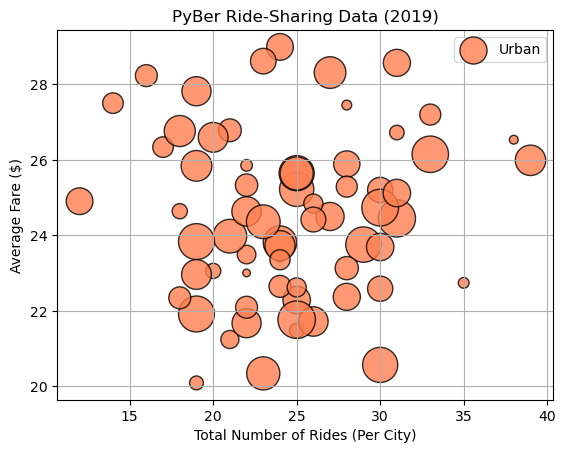

In [20]:
# Urban City Bubble Chart
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

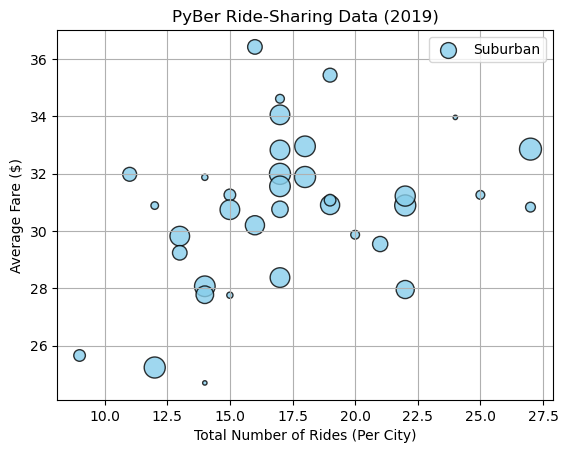

In [21]:
# Suburban City Bubble Chart
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Suburban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

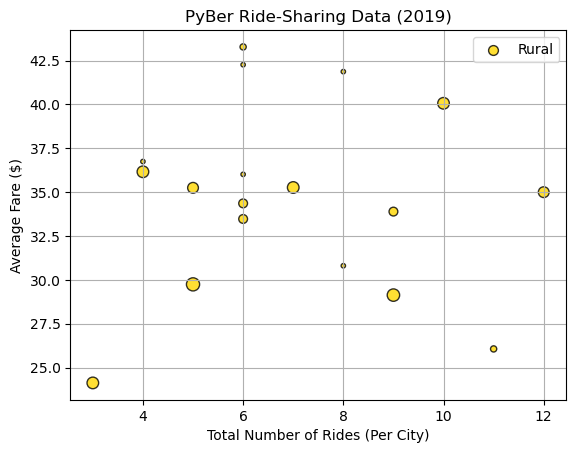

In [22]:
# Rural City Bubble Chart
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

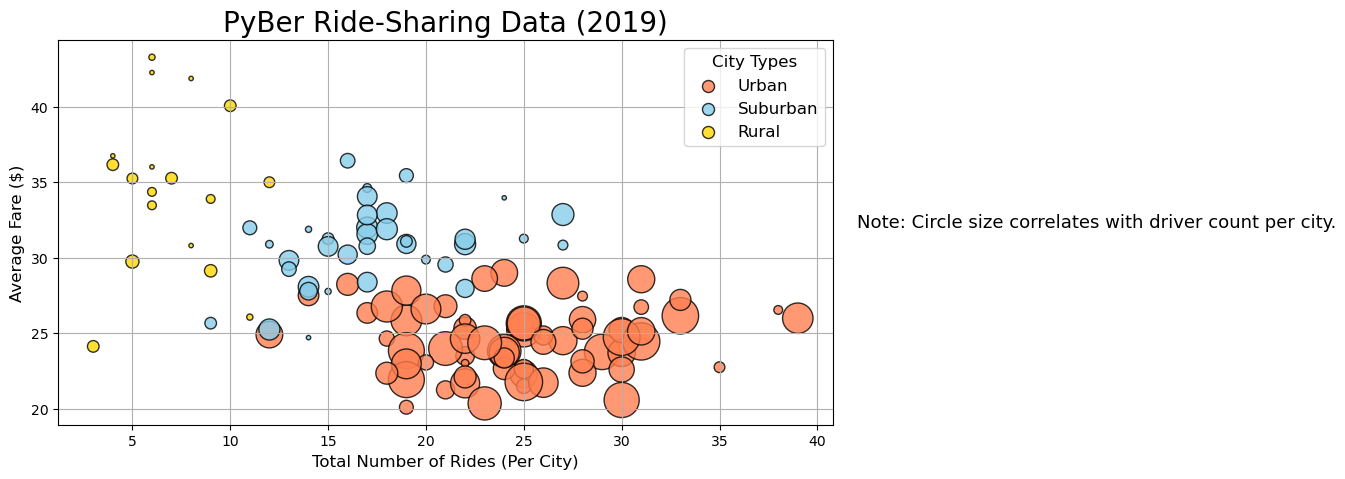

In [23]:
# Build the Bubble Chart for Each City Type

plt.subplots(figsize=(10,5))

# Urban City Bubble Chart
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Urban')

# Suburban City Bubble Chart
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Suburban')

# Rural City Bubble Chart
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural')


# Incorporate Labels
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)

# Creating a legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label for circle size
plt.text(42,32,"Note: Circle size correlates with driver count per city.",fontsize='13')

plt.savefig('analysis/Fig1.png', bbox_inches='tight')
# Show Plot
plt.show()

## Statistics

In [24]:
# Summary Statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [26]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


### Ride Count Statistics

In [27]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [32]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

##### Numpy and Scipy statistics


In [33]:
# Calc the measures of central tendency for the ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


C:\Users\whrzl\AppData\Local\Temp\ipykernel_16416\996830047.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_ride_count = sts.mode(rural_ride_count)


In [34]:
# Fares for urban cities
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [35]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


C:\Users\whrzl\AppData\Local\Temp\ipykernel_16416\244280386.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fares = sts.mode(urban_fares)


In [36]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [37]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban drivers is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban drivers is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban drivers is {mode_urban_drivers}.")

The mean fare price for urban drivers is $36.68.
The median fare price for urban drivers is $37.00.
The mode fare price for urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


C:\Users\whrzl\AppData\Local\Temp\ipykernel_16416\4121912226.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_drivers = sts.mode(urban_drivers)


### Box and Whisker Plot

#### Ride Count Data box and whisker plot

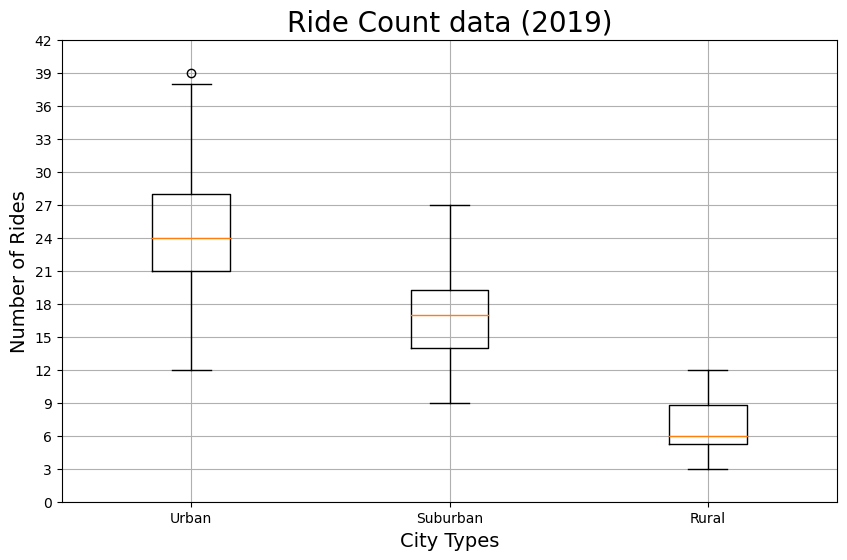

In [38]:
# All ride count box-and-whisker plots
x_labels = ["Urban", 'Suburban', 'Rural']
ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]

#Labels & formatting
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save image and show plots
plt.savefig("analysis/Fig2.png")
plt.show()

In [39]:
# Getting the outliers in Urban Cities
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest ride count.')

West Angela has the highest ride count.


#### Ride Fare Data and Box and whisker plots

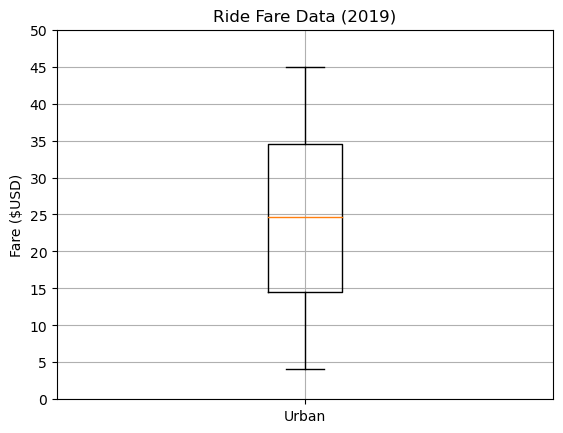

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [40]:
# Urban Box-and-Whisker plot for fare data
x_labels= ['Urban']
fig, ax = plt.subplots()

ax.boxplot(urban_fares,labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

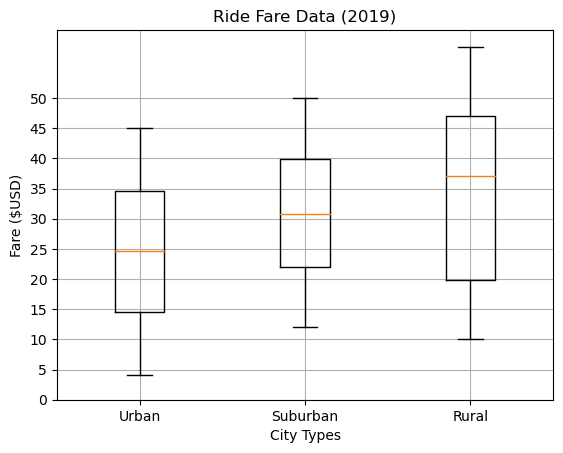

In [41]:
# Box-and-Whisker plot for fare data
x_labels= ['Urban','Suburban', 'Rural']

fare_count_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots()

ax.boxplot(fare_count_data,labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()

#### Driver Count Box and Whisker Plots

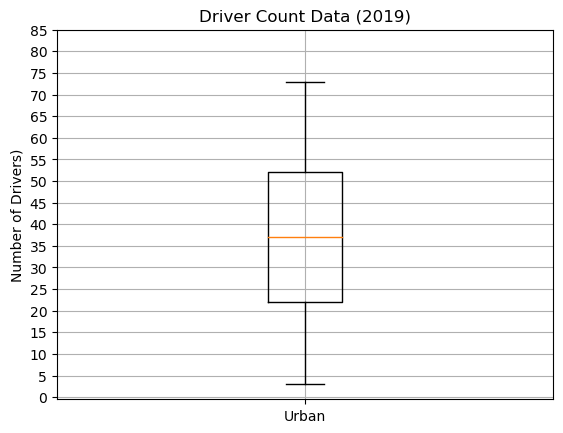

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [42]:
# Box-and-whisker plot for urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

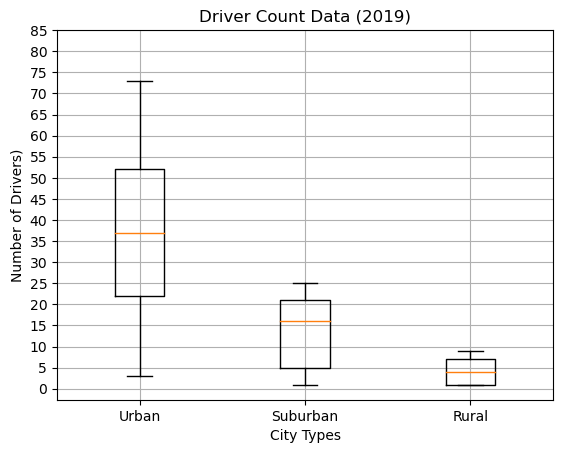

In [43]:
# Box-and-whisker plot for driver count data.
x_labels = ["Urban", 'Suburban', 'Rural']

driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots()
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

## Pie chart % of fares for each city

In [44]:
# Totaling the fares by city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [45]:
# Calc the total amount of fares in data
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [46]:
# Percentage of fares by type / total fares
type_percents = 100 * pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

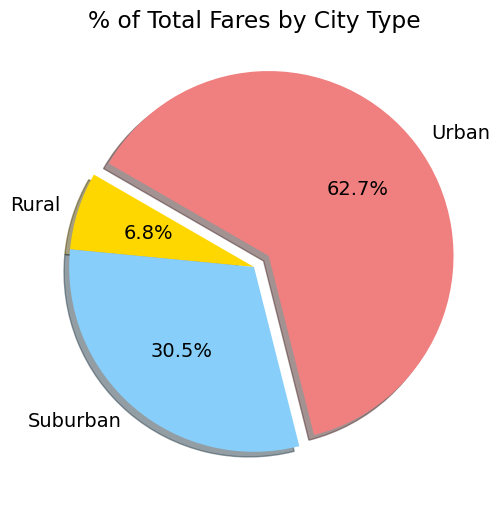

In [52]:
plt.subplots(figsize=(10,6))

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, 
    startangle=150)

plt.title("% of Total Fares by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig5.png')

plt.show()